In [6]:
import pegasus as pg

In [7]:
# !pip install scanpy

In [8]:
ls ../terra

1113mecom_ica.h5ad         mecom_1116.ipynb
1113mecom_ica.sce.rsd      mecom_ss2_10x.sce.rsd
1113mecom_ss2_10x.h5ad     sce2h5ad.ipynb
201116_mecom_10x_rv3.h5ad  seurat.ipynb
MPAL.ipynb


In [82]:
# data = pg.read_input("../terra/1113mecom_ss2_10x.h5ad")
# data_mpal = pg.read_input("../../../datasets/MPAL-Single-Cell-2019/scRNA-Healthy-Hematopoiesis-191120.h5ad")
# data = pg.read_input("../lhsc_10x_3rd.GRCh38-rna.h5ad")
# data=pg.read_input("~/Projects/mecom/exp/200703/matrix/200803_mecom_af_cellcyc.h5ad")
# data=pg.read_input("~/Projects/mecom/exp/200703/matrix/200803_mecom.h5ad")
# data=pg.read_input("~/Projects/mecom/exp/200703/matrix/adata_pg.h5ad")
# data=pg.read_input("~/Projects/mecom/exp/200703/matrix/201116_mecom_ss2_genotye_rv3_pg.h5ad")

data=pg.read_input("~/Projects/mecom/exp/201110/matrix/210110_all.h5ad")


2021-04-13 11:34:45,144 - pegasusio.readwrite - INFO - h5ad file '/Users/ltao/Projects/mecom/exp/201110/matrix/210110_all.h5ad' is loaded.
2021-04-13 11:34:45,145 - pegasusio.readwrite - INFO - Function 'read_input' finished in 0.57s.


In [83]:
data.X

<768x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 2369893 stored elements in Compressed Sparse Row format>

In [84]:
pwd

'/Users/ltao/Projects/mecom/exp/10x_20201021/pengas_notebooks'

In [85]:
data.obs['Channel']=data.obs['sample_type']
# data.obs['Channel']=data.obs['plate']

In [86]:
data.uns['genome']='GRCh38'

In [87]:
data.uns['modality']='rna'

In [88]:
data=data[data.obs['n_genes']>2000].copy()

* Finally, embedding attributes on cell barcodes: `data.obsm`; as well as on genes, `data.varm`. We'll see it in later sections.

## Preprocessing

### Filtration

The first step in preprocessing is to perform the quality control analysis, and remove cells and genes of low quality.

We can generate QC metrics using the following method with default settings:

In [89]:
# pg.qc_metrics(data, min_genes=500, max_genes=6000,percent_mito=20, mito_prefix='MT-')
pg.qc_metrics(data, min_genes=2000, max_genes=20000,percent_mito=20, mito_prefix='MT-')

In [90]:
df_qc = pg.get_filter_stats(data)
df_qc

,kept,median_n_genes,median_n_umis,median_percent_mito,filt,total,median_n_genes_before,median_n_umis_before,median_percent_mito_before
Channel,,,,,,,,,
aavs,181,6000,1000000.0,4.273306,0,181,6000,1000000.0,4.273306
mecom,212,5816,1000000.0,5.291602,0,212,5816,1000000.0,5.291602


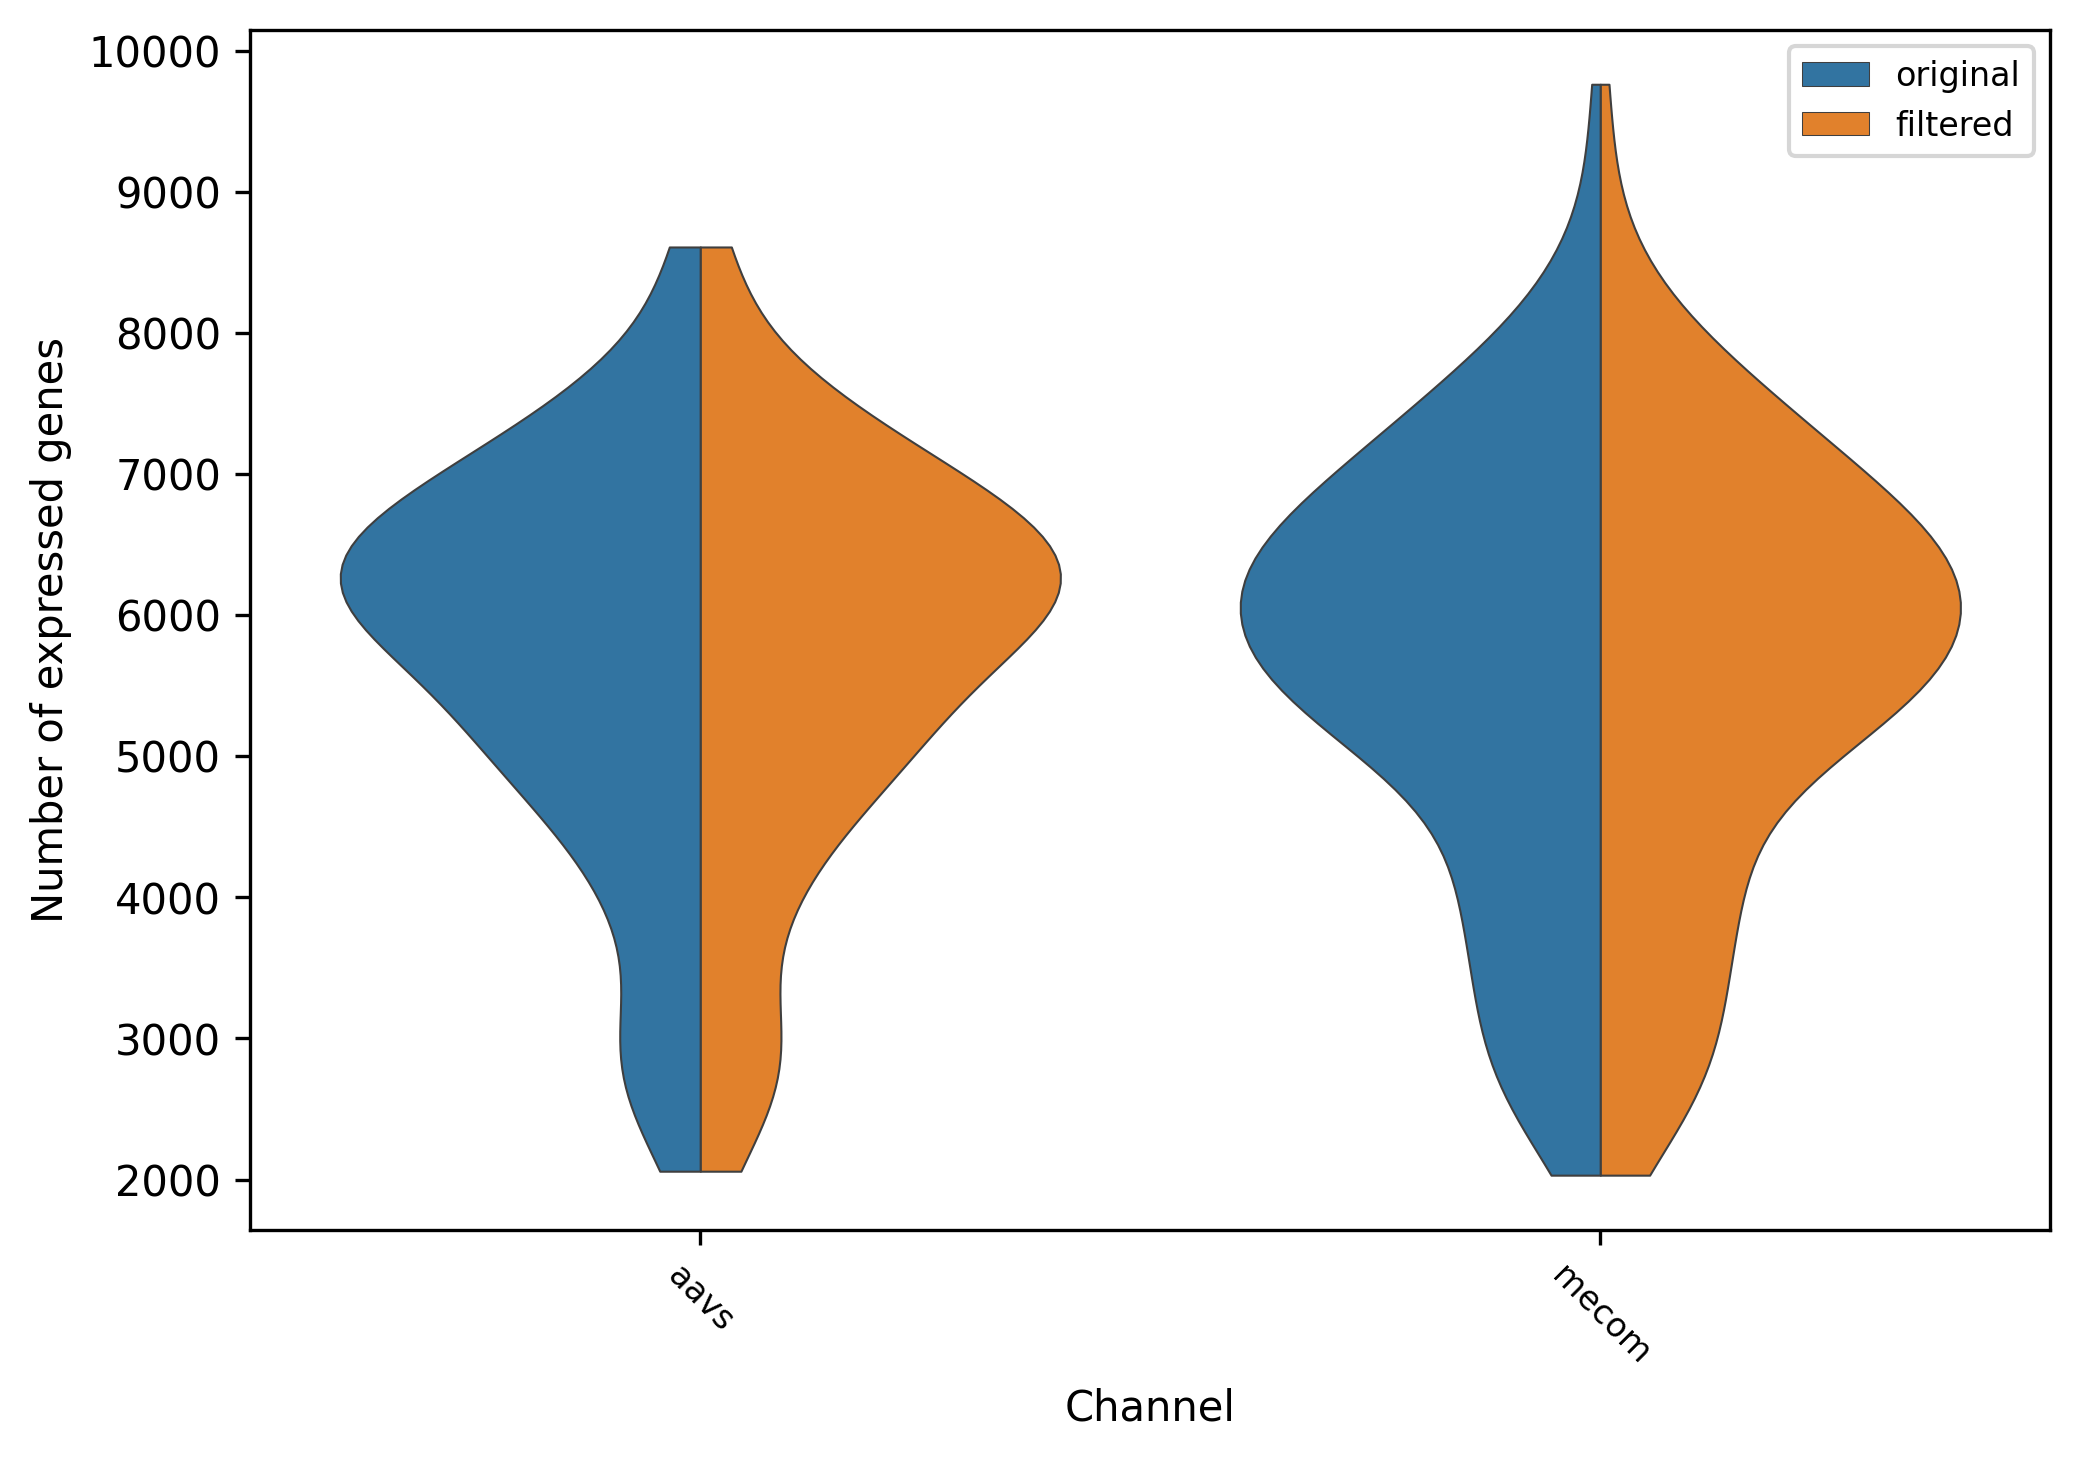

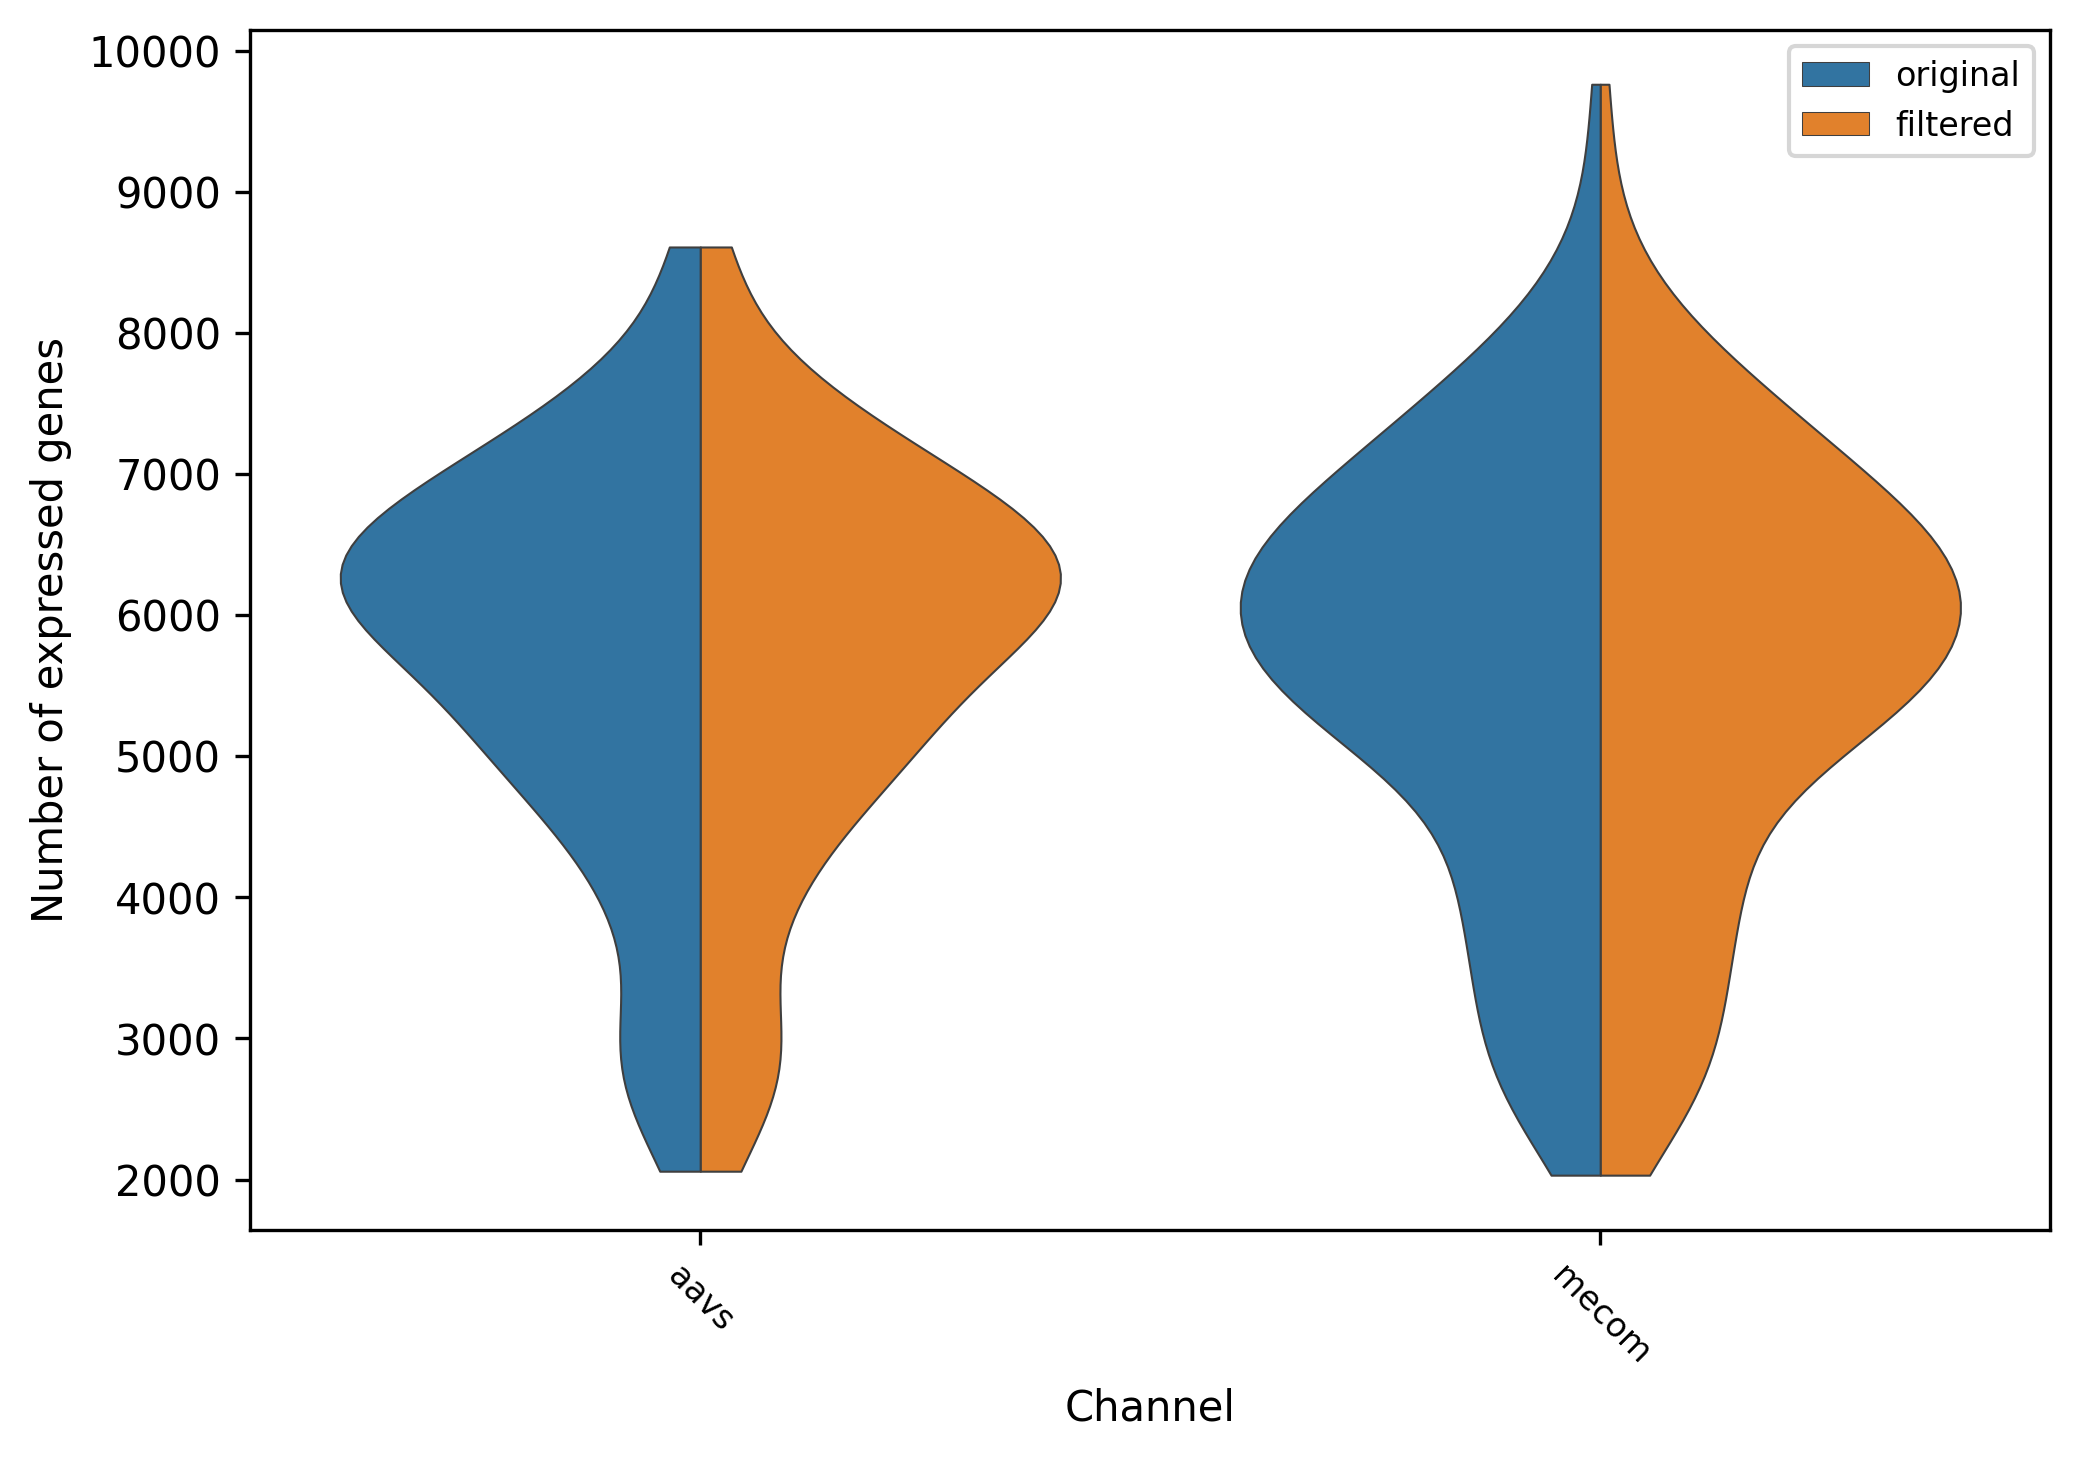

In [91]:
pg.qcviolin(data,return_fig = True, plot_type='gene')

Then on number of UMIs:

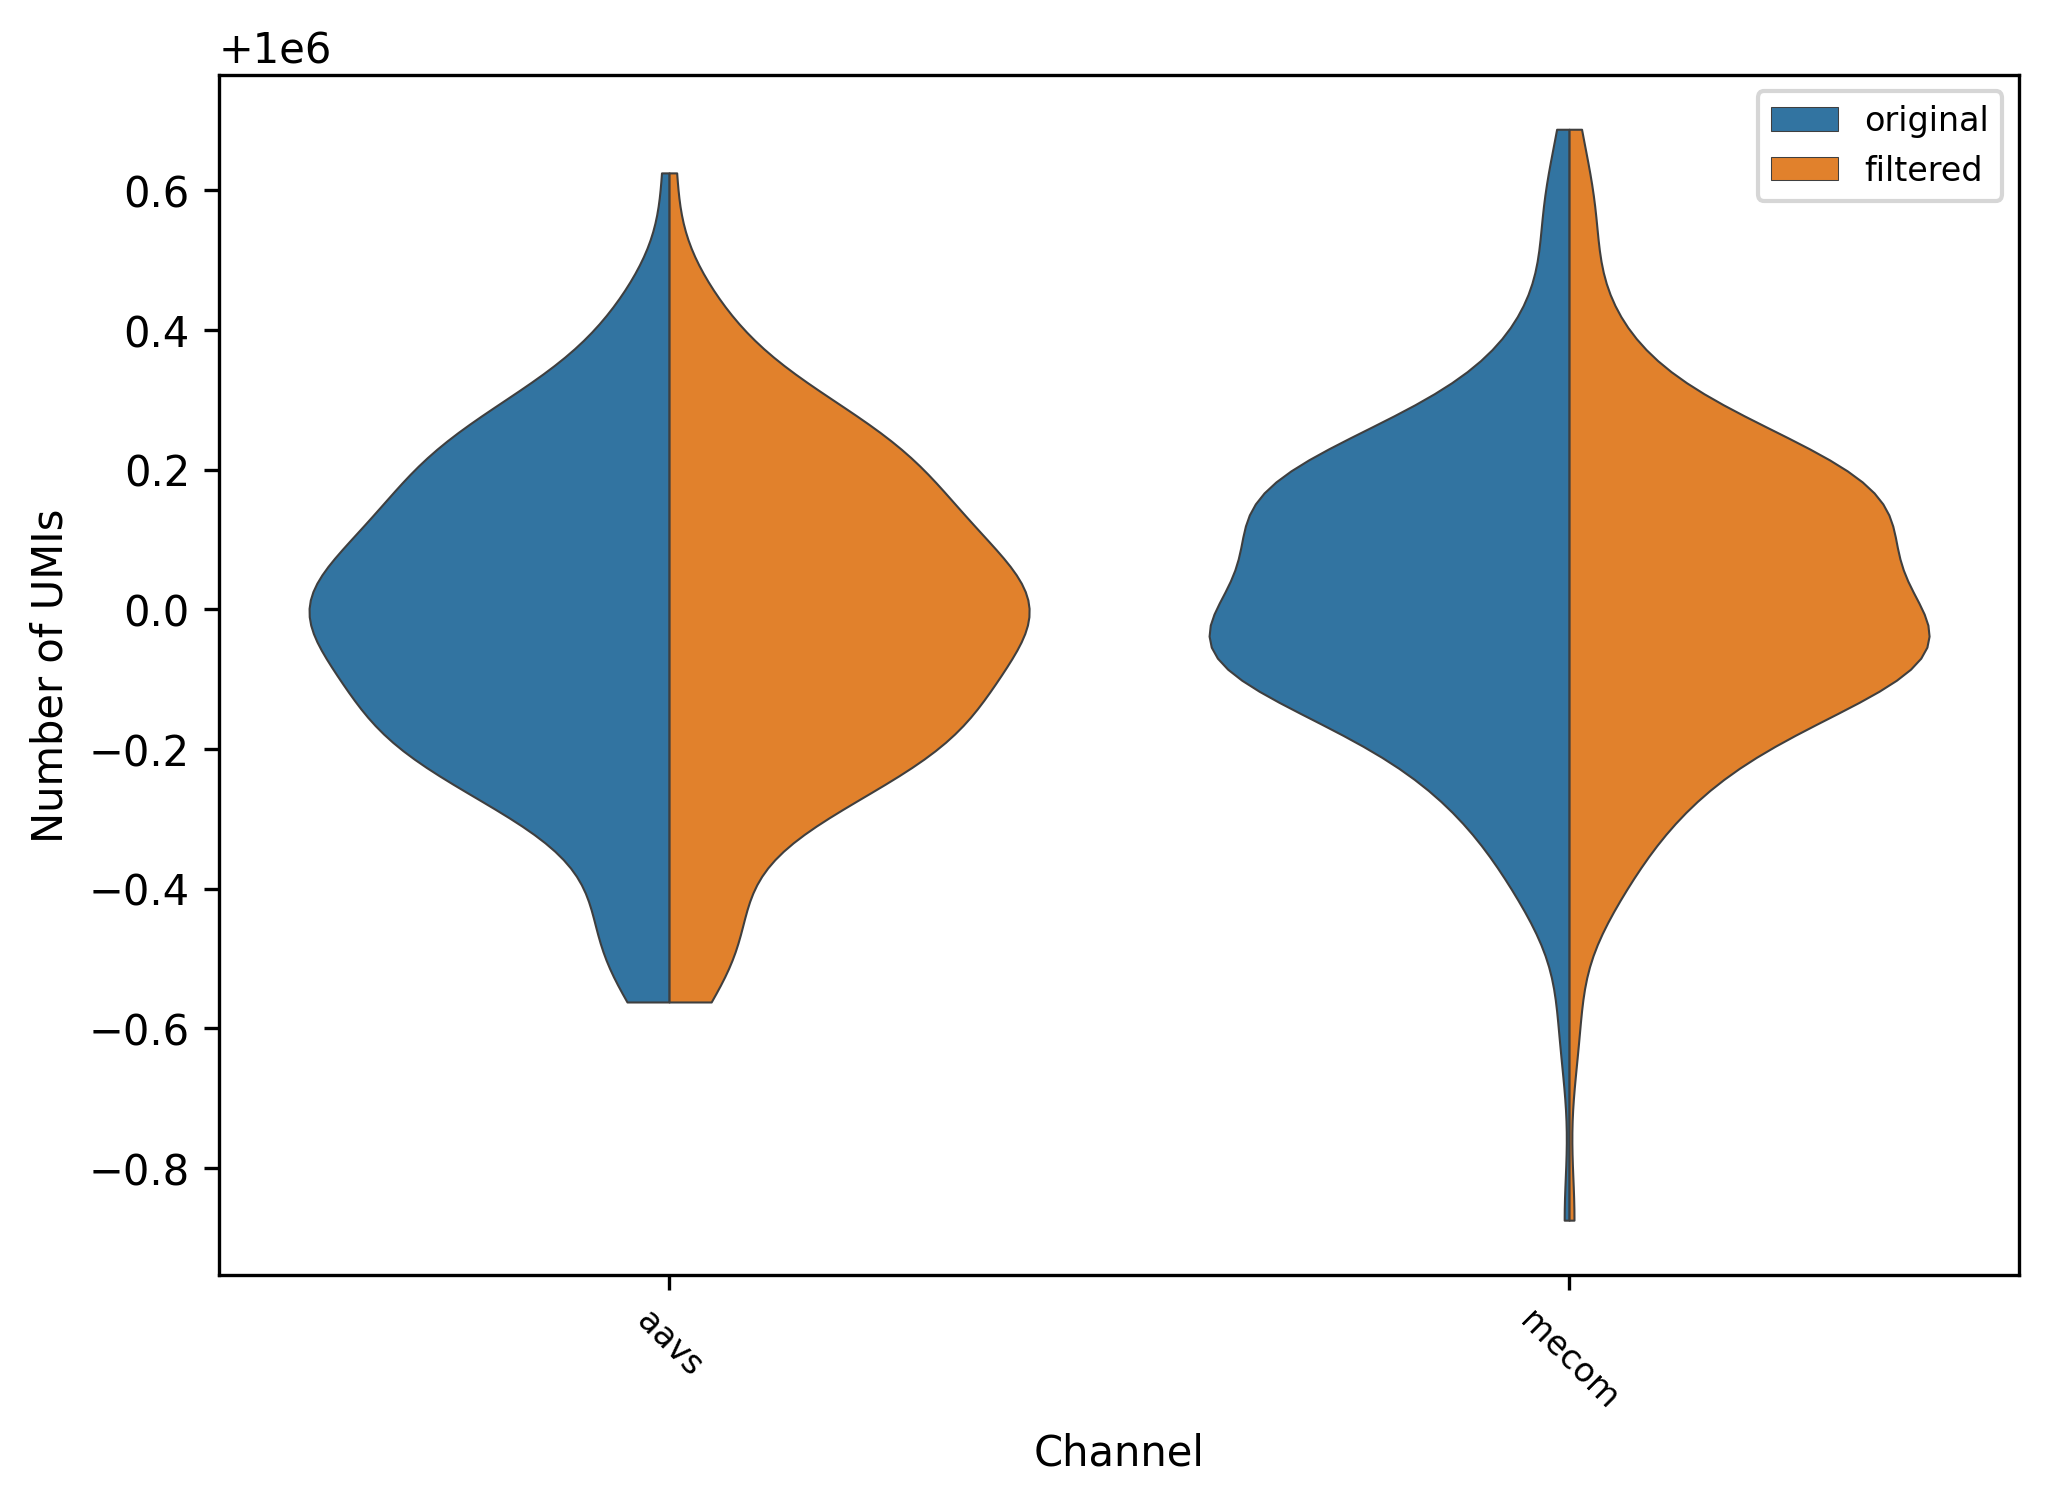

In [92]:
pg.qcviolin(data, plot_type='count')

On number of percentage of mitochondrial genes:

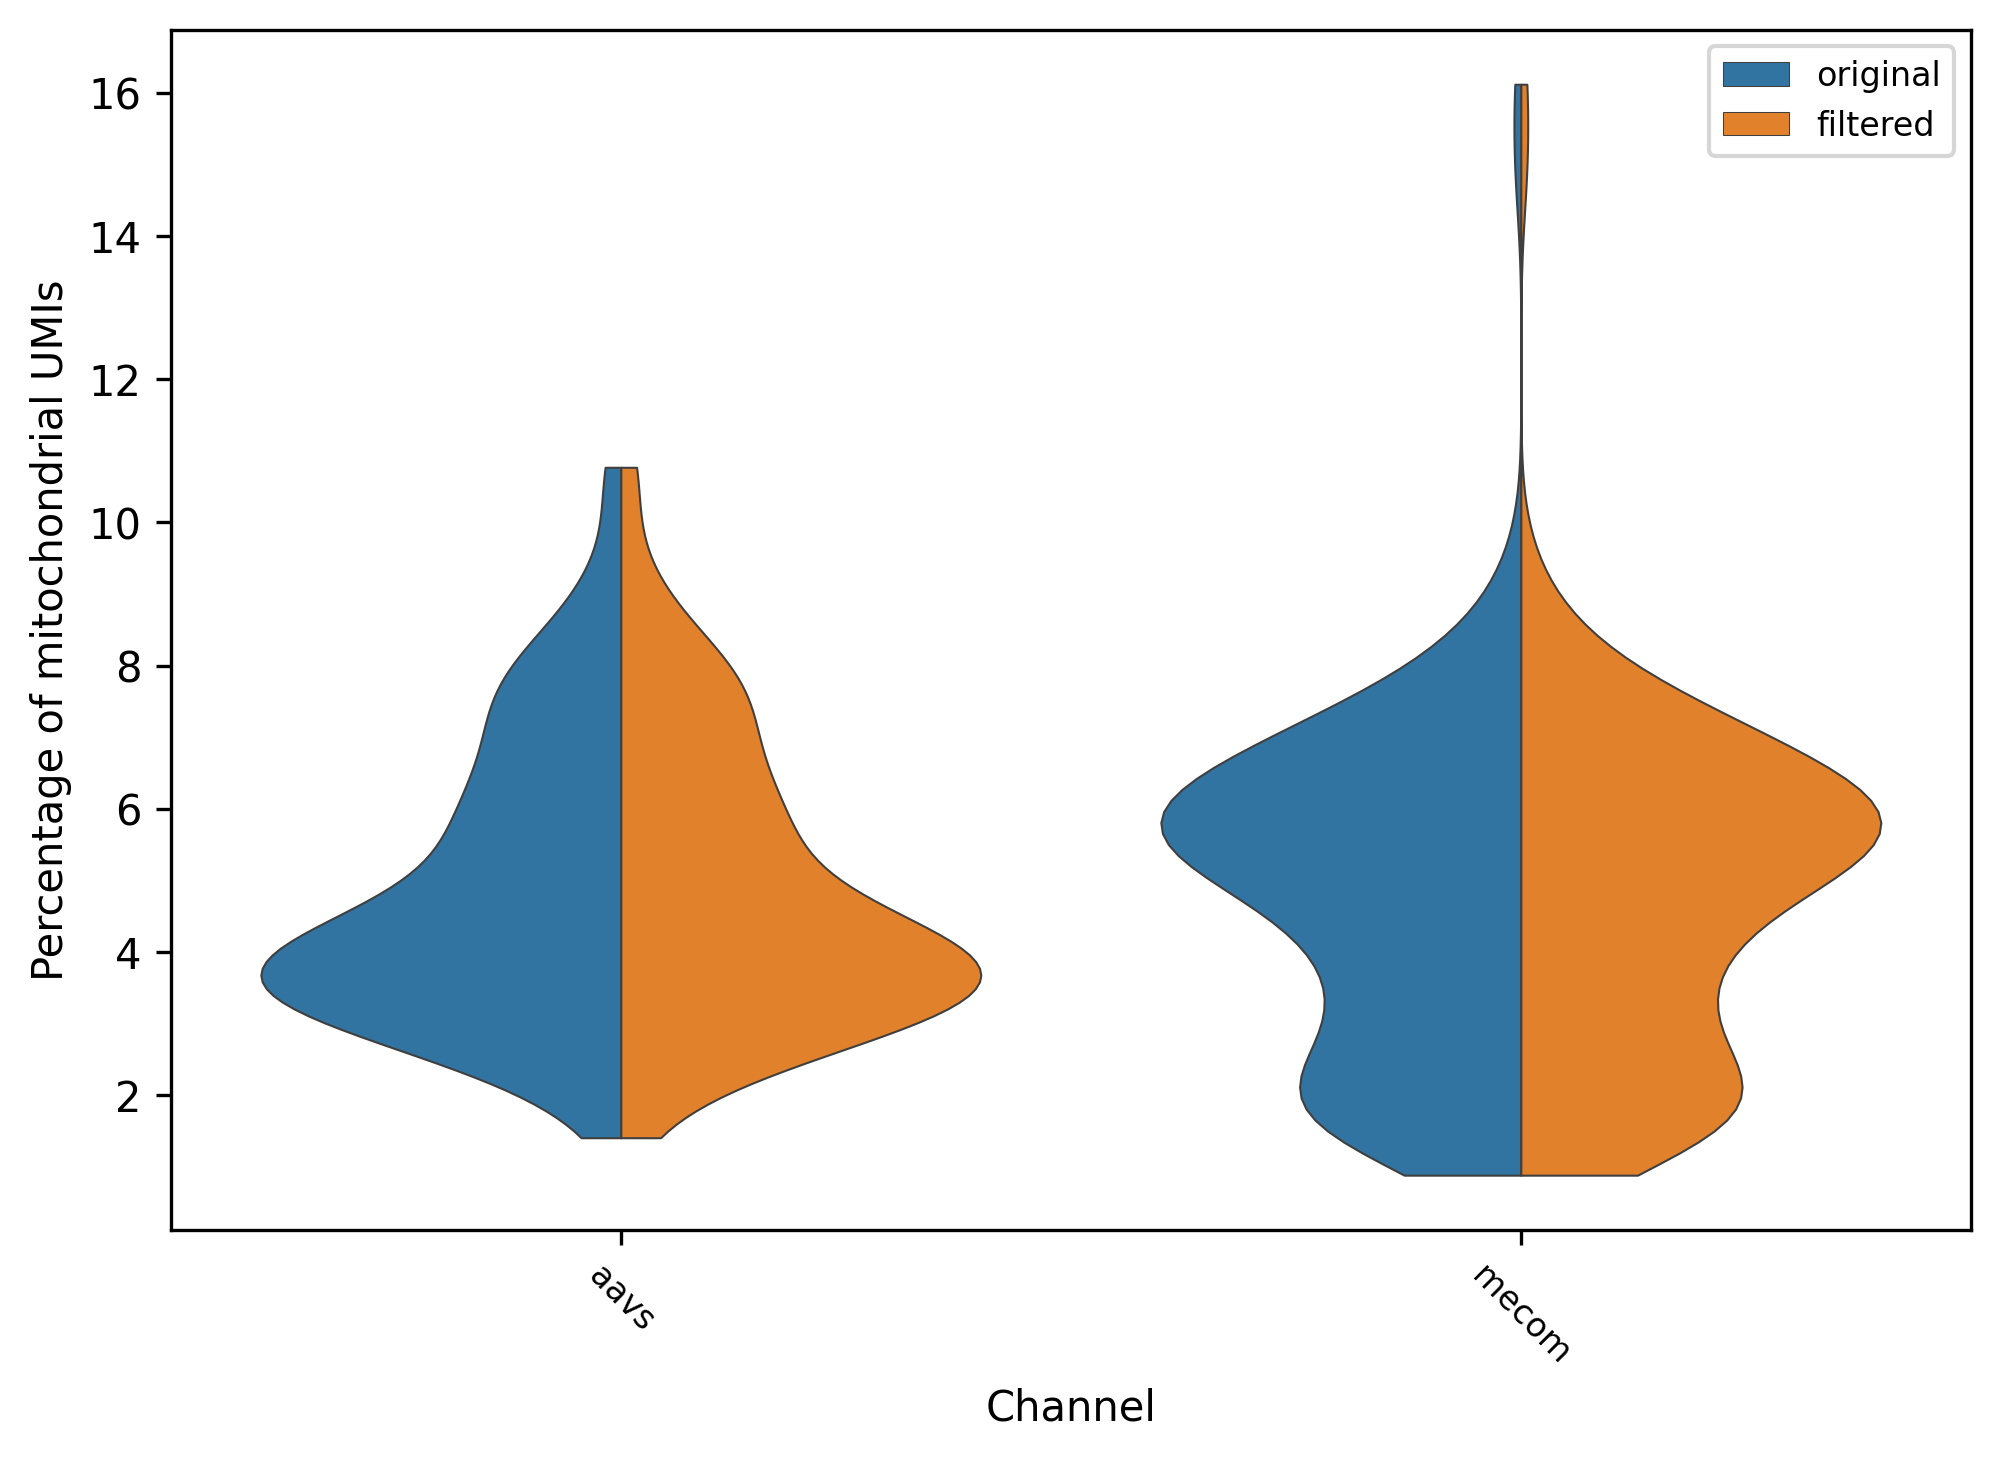

In [93]:
pg.qcviolin(data, plot_type='mito')